In [78]:
import pandas as pd
import string
import matplotlib.pyplot as plt
import re

df = pd.read_csv('archives.csv')

for i in range(0, df.shape[0], 2):
    df = df.drop(i)

df = df[df['Text'].apply(lambda x: x != '[]')]

df['Date'] = pd.to_datetime(df['Date'])

df = df.sort_values(by='Date')

def remove_words_with_nt(text):
    return ' '.join(re.sub(r'\b\w*([nxtNXT])\w*\b', '', word) for word in text.split())

def remove_stop_symbols(text):
    text_to_remove = remove_words_with_nt(text)
    return ''.join(char for char in text_to_remove if char not in set(string.punctuation))

df['tokenized_text'] = df['Text'].apply(lambda x: remove_stop_symbols(x.lower()).split())

all_words = [word for tokens in df['tokenized_text'] for word in tokens]

word_frequency = pd.Series(all_words).value_counts().reset_index()
word_frequency.columns = ['word', 'frequency']

df = df.drop('tokenized_text', axis=1)

In [79]:
with open('stopwords.txt', 'r', encoding='utf-8') as file:
    stopwords = file.read().splitlines()

word_frequency = word_frequency[~word_frequency['word'].isin(stopwords)]
word_frequency = word_frequency.reset_index()
word_frequency = word_frequency.drop('index', axis=1)

word_frequency.head(10)

,word,frequency
0,україни,732
1,україні,362
2,січня,348
3,області,296
4,рф,256
5,чобіт,224
6,сил,216
7,повідомлялося,215
8,повідомляє,209
9,оборони,201


In [80]:
print('Найпопулярніші слова: ', word_frequency.head(10))

Найпопулярніші слова:              word  frequency
0        україни        732
1        україні        362
2          січня        348
3        області        296
4             рф        256
5          чобіт        224
6            сил        216
7  повідомлялося        215
8     повідомляє        209
9        оборони        201


In [81]:
word_frequency.to_csv('word_frequency.csv', index=True)

df.to_csv('archives_clear.csv', index=False)

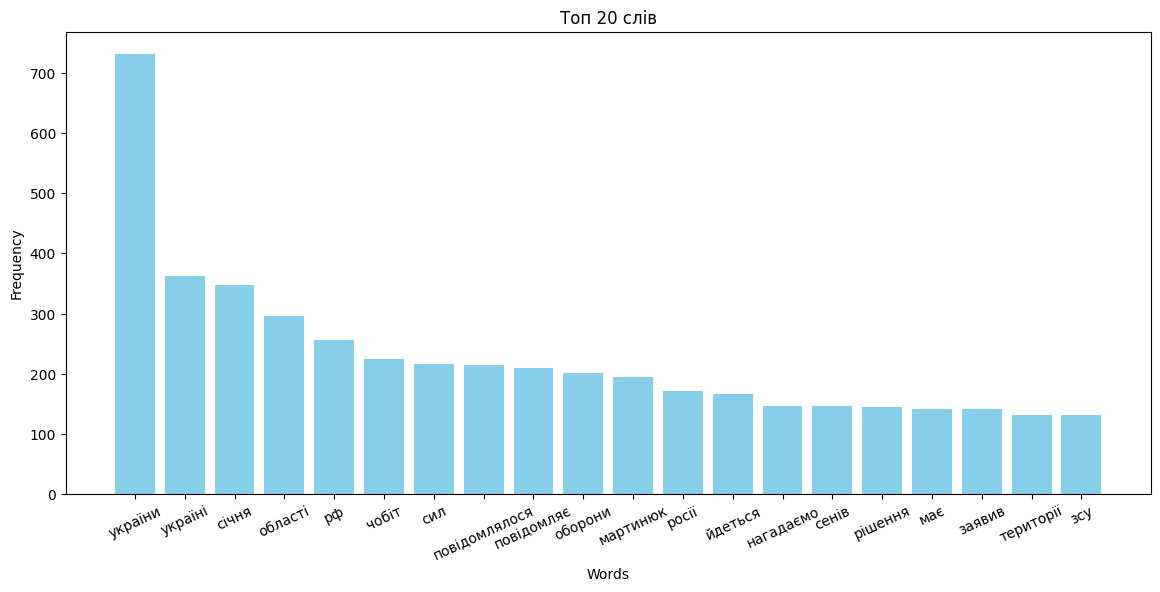

In [82]:
plt.figure(figsize=(14, 6))
plt.bar(word_frequency['word'][:20], word_frequency['frequency'][:20], color='skyblue')
plt.title('Топ 20 слів')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=25)
plt.show()